### Anatomical Tracings of Lesions After Stroke (ATLAS) R1.1

#### https://www.nature.com/articles/sdata201811

* Naming Convention 
For the full dataset archived with ICPSR, the naming convention and description of the files in ATLAS R1.1 can be found in the following table. 

![naming convention and description](atlas_table.png)


* Within the ATLAS R1.1 main folder, there is an excel file with the metadata for the entire dataset. 
* The data in this archive is in native space (i.e., original subject space; n=304). 
* Throughout the dataset, MRIs are named and sorted based on each cohort (c); each cohort is in the format of cXXXX where XXXX is the number that the cohort was assigned (e.g., c0001). There are 11 total cohorts.
* Within each cohort folder are the individual subject(s) folders. Subject folders are named based on the cohort that they are in (cXXXX), the subject number that they were assigned (sXXXX) and the time point at which they were taken (tXX) (e.g., c0001s0004t01). For instance, participants with data taken two weeks apart would have two time points, where t01 is the first time point and t02 is the second. Every image starts with the subject identifier of cXXXXsXXXXtXX.


In [21]:
!pip install nibabel

In [ ]:
!aws s3 cp s3://medical-images-research-assets/atlas/ATLAS_R1.1.zip . 
!unzip ATLAS_R1.1.zip    

In [22]:
!ls ATLAS_R1.1/Site2/031823/t01/

031823_LesionSmooth_1_stx.nii.gz  031823_t1w_deface_stx.nii.gz
031823_LesionSmooth_stx.nii.gz


<class 'nibabel.nifti1.Nifti1Image'>
data shape (197, 233, 189)
affine: 
[[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 197 233 189   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Nov 11 2008'
aux_file        : b''
qform_code      : scanne

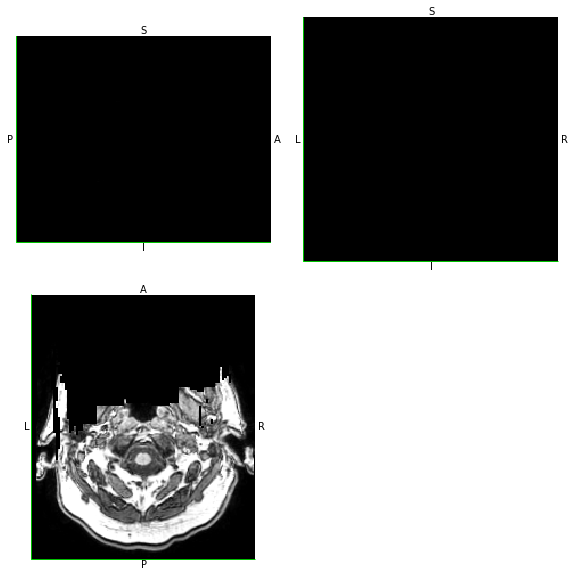

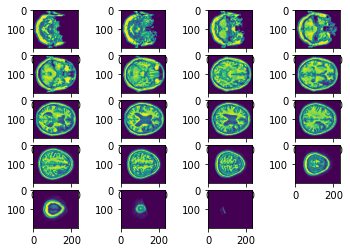

In [28]:
import matplotlib
from matplotlib import pylab as plt
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
 
#031823_LesionSmooth_1_stx.nii.gz the 2nd large segment   
#031823_LesionSmooth_stx.nii.gz segmentation marked
#031823_t1w_deface_stx.nii.gz

file = './ATLAS_R1.1/Site2/031823/t01/031823_t1w_deface_stx.nii.gz'
img = nib.load(file)    
 
print(img)
print(img.header['db_name'])   
 
width, height, queue = img.dataobj.shape
 
OrthoSlicer3D(img.dataobj).show()
 
num = 1
for i in range(0, queue, 10):
    img_arr = img.dataobj[:,:,i]
    plt.subplot(5,4,num)
    plt.imshow(img_arr)
    num += 1
 
plt.show()


In [15]:
!pip install nilearn

     |████████████████████████████████| 3.0 MB 7.0 MB/s eta 0:00:01


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


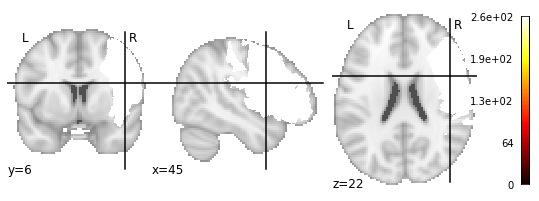

In [16]:
from nilearn import plotting
plotting.plot_stat_map(file)
